# 3.1 Victim Model

In [24]:
#importing necessary packages
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical

# Loading and data preprocessing 
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Model implementation
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),# activation function
    Dense(10, activation='softmax')#activation function
])

# Compiling the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Training the model
model.fit(train_images, train_labels, epochs=10, batch_size=64, validation_split=0.1)

# Evaluating the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc}")

Epoch 1/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.8592 - loss: 0.4415 - val_accuracy: 0.9715 - val_loss: 0.0887
Epoch 2/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.9823 - loss: 0.0563 - val_accuracy: 0.9862 - val_loss: 0.0502
Epoch 3/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.9874 - loss: 0.0413 - val_accuracy: 0.9882 - val_loss: 0.0427
Epoch 4/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.9909 - loss: 0.0299 - val_accuracy: 0.9903 - val_loss: 0.0370
Epoch 5/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.9925 - loss: 0.0237 - val_accuracy: 0.9907 - val_loss: 0.0351
Epoch 6/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.9947 - loss: 0.0182 - val_accuracy: 0.9907 - val_loss: 0.0309
Epoch 7/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.9959 - loss: 0.0140 - val_accuracy: 0.9910 - val_loss: 0.0334
Epoch 8/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.9957 - loss: 0.0135 - 

/var/folders/dz/tvcs2gh939j519q07st8j37m0000gn/T/ipykernel_20023/1842863644.py:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs, training_acc, 'b', label='Training acc', color= "red")


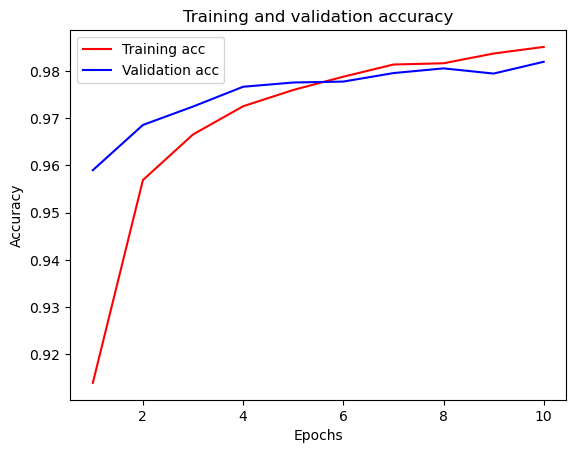

In [23]:
import matplotlib.pyplot as plt

# Extract accuracy history
training_acc = history.history['acc']
validation_acc = history.history['val_acc']
epochs = range(1, len(training_acc) + 1)

# Plot training and validation accuracy
plt.plot(epochs, training_acc, 'b', label='Training acc', color= "red")
plt.plot(epochs, validation_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


# 3.2 AE Attack with FGSM implementation

In [25]:
import tensorflow as tf

# Assume that train_images and train_labels are your input data and labels respectively
image = train_images[0:1]  # Use one image from your training set
image_label = train_labels[0:1]  # Corresponding true label

# Convert to TensorFlow tensors
image = tf.convert_to_tensor(image, dtype=tf.float32)
image_label = tf.convert_to_tensor(image_label, dtype=tf.float32)

def create_adversarial_pattern(input_image, input_label, model):
    loss_object = tf.keras.losses.CategoricalCrossentropy()
    with tf.GradientTape() as tape:
        tape.watch(input_image)
        prediction = model(input_image)
        loss = loss_object(input_label, prediction)
    gradient = tape.gradient(loss, input_image)
    signed_grad = tf.sign(gradient)
    return signed_grad

epsilon = 0.01  # Small epsilon value

# Generating perturbations
perturbations = create_adversarial_pattern(image, image_label, model)
adv_image = image + epsilon * perturbations  # Creating adversarial image

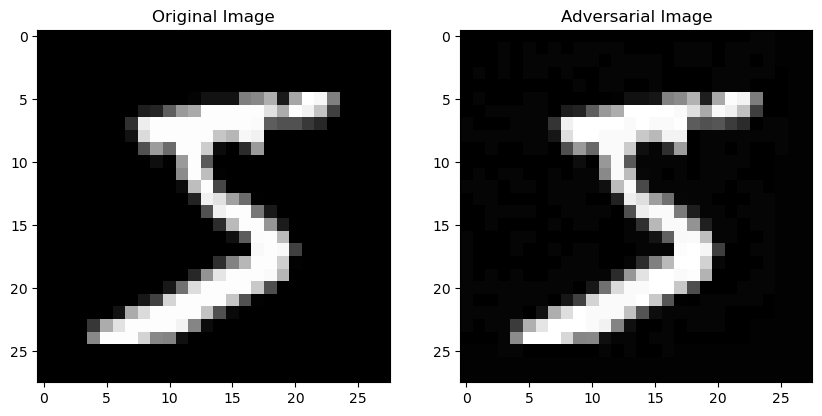

In [28]:
# Display the original and adversarial images
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image.numpy().squeeze(), cmap='gray')
plt.subplot(1, 2, 2)
plt.title('Adversarial Image')
plt.imshow(adv_image.numpy().squeeze(), cmap='gray')
plt.show()

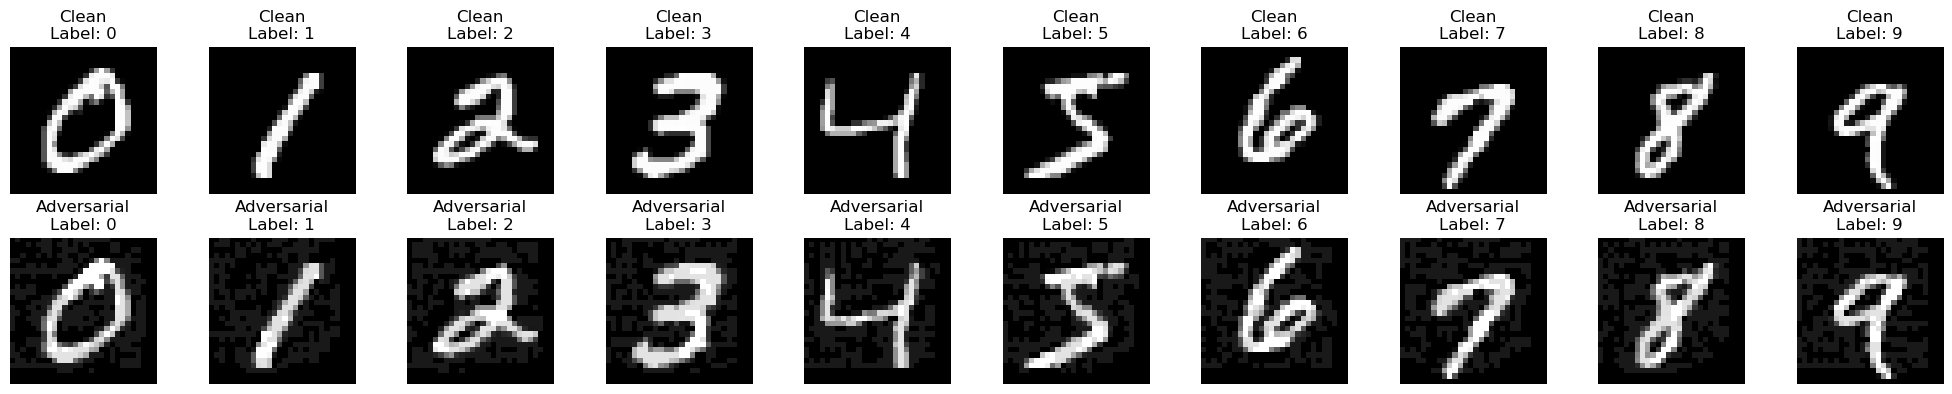

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist

# Loading the MNIST dataset
(train_x, train_y), (_, _) = mnist.load_data()

# Normalizing the images
train_x = train_x / 255.0

# Selecting one sample for each class
unique_classes = np.unique(train_y)
indices = [np.where(train_y == u)[0][0] for u in unique_classes]

clean_samples = train_x[indices]
clean_labels = train_y[indices]

# Define the FGSM attack function
def create_adversarial_pattern(input_image, input_label, model):
    loss_object = tf.keras.losses.SparseCategoricalCrossentropy()
    with tf.GradientTape() as tape:
        tape.watch(input_image)
        prediction = model(input_image)
        loss = loss_object(input_label, prediction)
    gradient = tape.gradient(loss, input_image)
    signed_grad = tf.sign(gradient)
    return signed_grad

# Generating adversarial examples
epsilon = 0.1  # Perturbation amount
adv_examples = []

for img, label in zip(clean_samples, clean_labels):
    img_tensor = tf.convert_to_tensor(img.reshape((1, 28, 28)), dtype=tf.float32)
    label_tensor = tf.convert_to_tensor([label], dtype=tf.int64)
    perturbations = create_adversarial_pattern(img_tensor, label_tensor, model)
    adv_img = img_tensor + epsilon * perturbations
    adv_img = tf.clip_by_value(adv_img, 0, 1).numpy()
    adv_examples.append(adv_img.reshape(28, 28))

# Plotting the clean and adversarial examples
fig, axes = plt.subplots(2, 10, figsize=(20, 4))

for i, ax in enumerate(axes.flat):
    if i < 10:
        ax.imshow(clean_samples[i], cmap='gray')
        ax.set_title("Clean\nLabel: {}".format(clean_labels[i]))
    else:
        ax.imshow(adv_examples[i - 10], cmap='gray')
        ax.set_title("Adversarial\nLabel: {}".format(clean_labels[i - 10]))
    ax.axis('off')

plt.tight_layout()
plt.show()


In [31]:

# Convert adversarial examples and labels to tensors for evaluation
adv_examples_tensor = tf.convert_to_tensor(adv_examples, dtype=tf.float32)
clean_labels_tensor = tf.convert_to_tensor(clean_labels, dtype=tf.int64)

# Make predictions on the adversarial examples
predictions = model.predict(adv_examples_tensor)

# Convert predictions to class labels
predicted_labels = np.argmax(predictions, axis=1)

# Calculate the success rate of the adversarial attack
# Success is when the predicted label does not match the true label
success_rate = np.mean(predicted_labels != clean_labels) * 100

print(f"Adversarial Attack Success Rate: {success_rate:.2f}%")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Adversarial Attack Success Rate: 0.00%
